# Image in Gray Scale

In [1]:
import cv2

In [2]:
import pytesseract

In [3]:
import numpy as np

In [4]:
import imutils

In [5]:
import matplotlib.pyplot as plt 

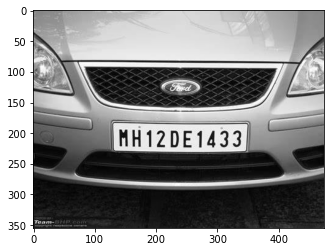

In [6]:
image = cv2.imread("car_2.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

# Apply Filter

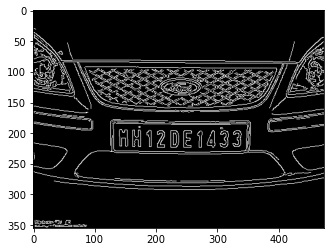

In [7]:
bifilter = cv2.bilateralFilter(gray_image, 11, 17, 17)
edges = cv2.Canny(bifilter,70,200)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))


# FInd Contours

In [8]:
cntpoints = cv2.findContours(edges.copy(),mode = cv2.RETR_TREE,method = cv2.CHAIN_APPROX_SIMPLE)
cnt = imutils.grab_contours(cntpoints)
cnt = sorted(cnt, key=cv2.contourArea, reverse=True)[:10]

In [9]:
NumberPlateCnt = None
count = 0
for c in cnt:
        perimeter = cv2.arcLength(c, True)
        epsilon = 0.01 * perimeter
        approx = cv2.approxPolyDP(c, epsilon , True)
        if len(approx) == 4:  # Select the contour with 4 corners
            print(approx)
            NumberPlateCnt = approx #This is our approx Number Plate Contour
            break

[[[130 186]]

 [[135 229]]

 [[347 226]]

 [[347 185]]]


In [10]:
NumberPlateCnt

array([[[130, 186]],

       [[135, 229]],

       [[347, 226]],

       [[347, 185]]], dtype=int32)

# Apply Mask 

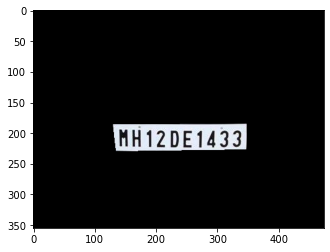

In [11]:
mask = np.zeros(gray_image.shape, np.uint8)
img = cv2.drawContours(mask, [NumberPlateCnt], 0, 255, -1)
img = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

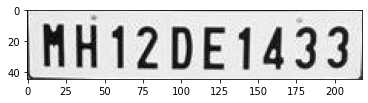

In [12]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
crop_img = gray_image[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))

# Reading OCR text

In [13]:
import easyocr

In [14]:
read = easyocr.Reader(['en'])
text = read.readtext(crop_img)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\Neha\AppData\Roaming\Python\Python38\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [15]:
text

[([[3, 1], [217, 1], [217, 45], [3, 45]], 'MH12DE1433', 0.5835745361963988)]

In [16]:
plat_no = text[0][1]
plat_no

'MH12DE1433'

# Getting information about Vehicle

In [17]:
import requests

In [18]:
req = requests.get("https://rtovehicleinformation.codefind.in/")
print(req.url)

                           

https://rtovehicleinformation.codefind.in/
